## Observations and Insights

## Dependencies and starter code

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM (standard error of the mean) 
# of the tumor volume for each regimen

# tumor_vol = data_complete.describe()["Tumor Volume (mm3)"]
tumor_vol = data_complete.set_index(["Drug Regimen"])["Tumor Volume (mm3)"]
tumor_vol

Drug Regimen
Ramicane    45.000000
Ramicane    38.825898
Ramicane    35.014271
Ramicane    34.223992
Ramicane    32.997729
              ...    
Naftisol    63.145652
Naftisol    65.841013
Naftisol    69.176246
Naftisol    70.314904
Naftisol    73.867845
Name: Tumor Volume (mm3), Length: 1893, dtype: float64

In [23]:
tumor_vol_grouped = tumor_vol.groupby("Drug Regimen")
tumor_vol_grouped.describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [24]:
tumor_vol_mean = tumor_vol_grouped.describe()["mean"]
tumor_vol_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: mean, dtype: float64

In [25]:
tumor_vol_median = tumor_vol_grouped.median()
tumor_vol_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [26]:
tumor_vol_var = tumor_vol_grouped.var()
tumor_vol_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [27]:
tumor_vol_std = tumor_vol_grouped.describe()["std"]
tumor_vol_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: std, dtype: float64

In [28]:
tumor_vol_sem = tumor_vol_grouped.sem()
tumor_vol_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [29]:
tumor_vol_stats = pd.DataFrame({"Mean": tumor_vol_mean, 
                                "Median": tumor_vol_median,
                                "Variance": tumor_vol_var,
                                "Standard Deviation": tumor_vol_std,
                                "SEM": tumor_vol_sem,
                               })

tumor_vol_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [45]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Filter the DataFrame down only to those columns to chart
drug_regimen = data_complete["Drug Regimen"].value_counts()
drug_regimen.head()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Name: Drug Regimen, dtype: int64

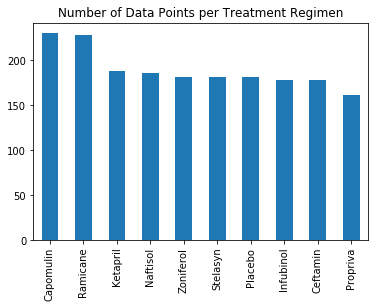

<Figure size 432x288 with 0 Axes>

In [58]:
# Use DataFrame.plot() in order to create a bar chart of the data
#drug_regimen.plot(kind="bar", figsize=(10,3))
drug_regimen.plot(kind="bar")

# HOW TO MAKE TICK LABELS ROTATE 45?
# THIS IS NOT WORKING:
#drug_regimen_plot = drug_regimen.set_xticklabels(drug_regimen.index, rotation=45)

# Set a title for the chart
plt.title("Number of Data Points per Treatment Regimen")

plt.show()
plt.tight_layout()

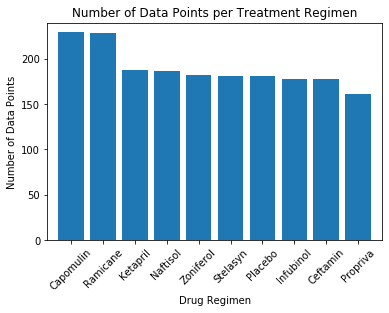

<Figure size 432x288 with 0 Axes>

In [57]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# drug_regimen from above is data points
x_axis = np.arange(len(drug_regimen))

#tick_locations = [value for value in x_axis] 
tick_locations = [] 
for x in x_axis:
    tick_locations.append(x)

plt.title("Number of Data Points per Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(data) + 10)

#plt.figure(figsize=(10,3))
plt.bar(x_axis, drug_regimen, align="center")
plt.xticks(tick_locations, drug_regimen.index, rotation=45)

plt.show()
plt.tight_layout()

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen